In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import nltk
from textblob import TextBlob
from manual_spellchecker import spell_checker
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score,classification_report
from sklearn.ensemble import ExtraTreesClassifier
import pickle
from nltk.corpus import stopwords
from imblearn.over_sampling import RandomOverSampler as ros 

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

In [264]:
df=pd.read_csv("labels.csv")
df.head(10)
del df['Unnamed: 0']
df.drop(['text_ocr'], axis=1, inplace=True)
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df['text_corrected']=df['text_corrected'].str.lower()
df['text_corrected'] = df['text_corrected'].str.replace('(\W)',' ')
stop_words=text.ENGLISH_STOP_WORDS
df['text_corrected'] = df['text_corrected'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#df['text_corrected'] = df['text_corrected'].str.replace('\d+', '')
#df['text_corrected'].apply(lambda x: str(TextBlob(x).correct()))
df

,image_name,text_corrected,overall_sentiment
0,image_1.jpg,look friend lightyear sohalikut trend play 10 ...,very_positive
1,image_2.jpeg,best 10 yearchallenge completed 4 years kudus ...,very_positive
2,image_3.JPG,sam thorne strippin follow follow saw posting ...,positive
3,image_4.png,10 year challenge sweet dee edition,positive
4,image_5.png,10 year challenge filter 47 hilarious 10 year ...,neutral
...,...,...,...
6982,image_6988.jpg,tuesday mardi gras wednesday valentine s frida...,neutral
6983,image_6989.jpg,watch movies 2017 iti chennai memes maanagaram...,neutral
6984,image_6990.png,talking planning soda junk food complaining wo...,positive
6985,image_6991.jpg,time fantasy time unless make time arhtisticli...,very_positive


In [265]:
df['overall_sentiment'] = df['overall_sentiment'].map({'very_positive':4,'positive':3,'negative':1,'very_negative':2,'neutral':0}) 

In [169]:
df

,text_corrected,overall_sentiment
0,look friend lightyear sohalikut trend play 10 ...,4
1,best 10 yearchallenge completed 4 years kudus ...,4
2,sam thorne strippin follow follow saw posting ...,3
3,10 year challenge sweet dee edition,3
4,10 year challenge filter 47 hilarious 10 year ...,0
...,...,...
6982,tuesday mardi gras wednesday valentine s frida...,0
6983,watch movies 2017 iti chennai memes maanagaram...,0
6984,talking planning soda junk food complaining wo...,3
6985,time fantasy time unless make time arhtisticli...,4


In [266]:
v=TfidfVectorizer()
x=v.fit_transform(df.text_corrected)
x=x.toarray()
x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [267]:
x,y=ros().fit_resample(x,df.overall_sentiment)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [269]:
df['overall_sentiment'].value_counts()

3    3123
0    2200
4    1033
1     480
2     151
Name: overall_sentiment, dtype: int64

In [195]:
#X, y = df.text_corrected, df.overall_sentiment
#df_train, df_test = train_test_split(df, test_size=0.20, stratify=df.overall_sentiment)

In [194]:
#vec = CountVectorizer(
#    ngram_range=(1, 3), 
#    stop_words="english",
#)

#X_train = vec.fit_transform(df_train.text_corrected)
#X_test = vec.transform(df_test.text_corrected)

#y_train = df_train.overall_sentiment
#y_test = df_test.overall_sentiment

In [270]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)

In [271]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
f1=f1_score(y_test, preds,average='weighted')

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print(accuracy_score(y_test, preds)) #0.57 0.47

[[281 104  59  86  95]
 [ 12 531  14  28  23]
 [  0   0 634   0   0]
 [141 119  60 171 136]
 [ 39  59  29  40 462]]
              precision    recall  f1-score   support

           0       0.59      0.45      0.51       625
           1       0.65      0.87      0.75       608
           2       0.80      1.00      0.89       634
           3       0.53      0.27      0.36       627
           4       0.65      0.73      0.69       629

    accuracy                           0.67      3123
   macro avg       0.64      0.67      0.64      3123
weighted avg       0.64      0.67      0.64      3123

0.6657060518731989


In [30]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
#classifier.fit(X_train, y_train)
#score = classifier.score(X_test, y_test)

#print("Accuracy:", score)
#print('Accuracy:', accuracy_score(y_test, y_pred))
#print("F1 Score: ",f1_score(y_test, y_pred,average='weighted')) 
#print(classification_report(y_test, y_pred))

In [272]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)
pickle.dump(rfc, open("model1.pkl","wb"))
# predict on test set
rfc_pred = rfc.predict(X_test)


accuracy_score(y_test, rfc_pred)
print('Accuracy:', accuracy_score(y_test, rfc_pred))
f2=f1_score(y_test, rfc_pred,average='weighted')

print("F1 Score: ",f1_score(y_test, rfc_pred,average='weighted')) #32
print(classification_report(y_test, rfc_pred))

Accuracy: 0.7848222862632085
F1 Score:  0.7740913813346153
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       625
           1       0.91      1.00      0.95       608
           2       0.98      1.00      0.99       634
           3       0.59      0.42      0.49       627
           4       0.78      0.89      0.83       629

    accuracy                           0.78      3123
   macro avg       0.77      0.79      0.77      3123
weighted avg       0.77      0.78      0.77      3123



In [273]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn#45 62
accuracy_score(y_pred_knn,y_test)
f3=f1_score(y_test, y_pred_knn,average='weighted')
print(confusion_matrix(y_test,y_pred_knn))

print(classification_report(y_pred_knn,y_test))

[[337  63   4  22 199]
 [ 17 574   1   1  15]
 [  0   0 634   0   0]
 [233  89   3  38 264]
 [ 72  31   3  10 513]]
              precision    recall  f1-score   support

           0       0.54      0.51      0.52       659
           1       0.94      0.76      0.84       757
           2       1.00      0.98      0.99       645
           3       0.06      0.54      0.11        71
           4       0.82      0.52      0.63       991

    accuracy                           0.67      3123
   macro avg       0.67      0.66      0.62      3123
weighted avg       0.81      0.67      0.72      3123



# images

In [93]:
from PIL import Image

In [104]:
image = Image.open('image_3312.jpg')

#image

Original size : (324, 400)


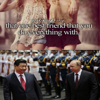

In [133]:
print(f"Original size : {image.size}")
sunset_resized = image.resize((100, 100))
sunset_resized

In [233]:
import cv2 #gives numi form 

img = cv2.imread('image_3312.jpg',cv2.IMREAD_GRAYSCALE)

#img
# Get original height and width
print(f"Original Dimensions : {img.shape}")

# resize image by specifying custom width and height
resized = cv2.resize(img, (100,100))
print(f"Original Dimensions : {resized.shape}")
array2 = resized.flatten()

data = pd.DataFrame(array2).T
data.index = ['Row_1']



Original Dimensions : (5553, 4501)
Original Dimensions : (100, 100)


In [235]:
type(array2)

numpy.ndarray

In [4]:
lst = ['NaN'] * 10000
from PIL import Image
import glob
#i='image_1.jpg'
#print(r"C:\Users\asimf\Downloads\images\""+i)
#image_list = []
#for filename in glob.glob(rf"C:\Users\asimf\Downloads\images\{i}"): #assuming gif
#    print(filename)
#    im=Image.open(filename)
#    image_list.append(im)
lisst=[]

names=[]
ar=[]
import os
#import cv2 #gives numi form 
from os import listdir
folder_dir = r"C:\Users\asimf\Downloads\images"
for imagesi in os.listdir(folder_dir):
    #print(imagesi)
    try:
        for filename in glob.glob(rf"C:\Users\asimf\Downloads\images\{imagesi}"): #assuming gif
            img = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
            print(imagesi)
            print(f"Original Dimensions : {img.shape}")
# resize image by specifying custom width and height
            resized = cv2.resize(img, (100,100))
            array2 = resized.flatten()
            data.loc[imagesi] = array2
            #print(array2)
            #ar.extend(array2) 
            names.append(imagesi)

    except AttributeError:
        data.loc[imagesi] =lst

    

image_1.jpg
Original Dimensions : (500, 735)
image_10.png
Original Dimensions : (533, 800)
image_100.jpg
Original Dimensions : (450, 600)
image_1000.png
Original Dimensions : (896, 500)
image_1001.png
Original Dimensions : (566, 500)
image_1002.png
Original Dimensions : (659, 500)
image_1003.png
Original Dimensions : (685, 500)
image_1004.png
Original Dimensions : (940, 500)
image_1005.jpg
Original Dimensions : (701, 590)
image_1006.png
Original Dimensions : (419, 500)
image_1007.jpg
Original Dimensions : (647, 735)
image_1008.png
Original Dimensions : (522, 500)
image_1009.png
Original Dimensions : (566, 500)
image_101.jpg
Original Dimensions : (300, 300)
image_1010.png
Original Dimensions : (200, 200)
image_1011.png
Original Dimensions : (202, 200)
image_1012.png
Original Dimensions : (202, 200)
image_1013.png
Original Dimensions : (202, 200)
image_1014.png
Original Dimensions : (501, 500)
image_1015.png
Original Dimensions : (654, 500)
image_1016.jpg
Original Dimensions : (483, 400)

In [22]:
arr = np.asarray(ar)

In [5]:
data.drop('Row_1',inplace=True)

In [6]:
data.reset_index(inplace=True)

In [7]:
data

,index,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,image_1.jpg,108,108,108,108,109,110,112,113,115,...,94,93,92,93,93,92,93,93,91,90
1,image_10.png,255,255,255,255,255,255,255,255,255,...,108,108,187,224,224,226,229,237,244,240
2,image_100.jpg,29,28,27,28,26,28,27,31,37,...,240,239,233,228,242,242,238,238,240,247
3,image_1000.png,82,72,82,72,72,78,66,66,39,...,255,255,255,255,255,255,255,255,255,255
4,image_1001.png,236,238,236,238,236,238,236,238,236,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,image_995.jpeg,142,142,144,144,144,145,145,145,145,...,108,90,77,90,95,104,108,115,115,120
6988,image_996.jpg,87,110,117,113,77,51,68,93,81,...,68,30,9,7,11,15,17,22,24,14
6989,image_997.jpg,225,225,238,18,225,225,225,225,225,...,68,81,69,69,76,74,74,68,79,77
6990,image_998.jpg,255,255,255,255,255,255,255,255,255,...,139,106,94,158,141,129,131,118,125,124


In [8]:
#data.to_csv('image_data.csv')

In [2]:
temp=pd.read_csv('image_data.csv')

In [3]:
del temp['Unnamed: 0']


In [4]:
temp['sort'] = temp['index'].str.extract('(\d+)', expand=False).astype(int)
temp.sort_values('sort',inplace=True, ascending=True)
temp = temp.drop('sort', axis=1)
temp.reset_index(inplace=True)
temp.drop('level_0',axis=1, inplace=True)
del temp['index']
temp=temp/2
temp=temp.round(2)
temp

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,54.0,54.0,54.0,54.0,54.5,55.0,56.0,56.5,57.5,58.0,...,47.0,46.5,46.0,46.5,46.5,46.0,46.5,46.5,45.5,45.0
1,127.5,127.5,127.5,127.5,127.5,126.5,127.0,124.5,124.0,122.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5
2,22.0,23.0,20.5,20.5,19.0,20.0,20.5,20.5,20.5,127.5,...,127.5,127.5,57.0,58.5,58.5,63.5,63.5,63.5,63.5,63.5
3,55.5,54.5,56.0,56.0,57.0,58.0,57.5,54.5,57.5,58.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5
4,125.5,125.5,126.0,126.0,126.0,125.0,126.0,125.5,125.5,125.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5
6988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6989,93.5,93.5,93.5,93.0,93.0,93.0,93.0,93.5,93.0,93.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5
6990,72.5,75.5,77.5,78.5,80.0,81.5,82.5,83.5,84.5,86.0,...,91.5,91.5,90.0,89.5,88.0,87.5,85.5,84.0,83.5,81.5


In [5]:
df_2=pd.read_csv("labels.csv")
df_2

,Unnamed: 0,image_name,text_ocr,text_corrected,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...,...,...
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive


In [6]:
temp['overall_sentiment']=df_2['overall_sentiment']

In [7]:
temp['overall_sentiment'] = temp['overall_sentiment'].map({'very_positive':4,'positive':3,'negative':1,'very_negative':2,'neutral':0}) 

In [8]:
temp

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
0,54.0,54.0,54.0,54.0,54.5,55.0,56.0,56.5,57.5,58.0,...,46.5,46.0,46.5,46.5,46.0,46.5,46.5,45.5,45.0,4
1,127.5,127.5,127.5,127.5,127.5,126.5,127.0,124.5,124.0,122.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,4
2,22.0,23.0,20.5,20.5,19.0,20.0,20.5,20.5,20.5,127.5,...,127.5,57.0,58.5,58.5,63.5,63.5,63.5,63.5,63.5,3
3,55.5,54.5,56.0,56.0,57.0,58.0,57.5,54.5,57.5,58.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,3
4,125.5,125.5,126.0,126.0,126.0,125.0,126.0,125.5,125.5,125.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,0
6988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6989,93.5,93.5,93.5,93.0,93.0,93.0,93.0,93.5,93.0,93.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,3
6990,72.5,75.5,77.5,78.5,80.0,81.5,82.5,83.5,84.5,86.0,...,91.5,90.0,89.5,88.0,87.5,85.5,84.0,83.5,81.5,4


In [9]:
temp.dropna(inplace=True)

In [10]:
temp.shape

(6988, 10002)

In [320]:
del temp['index']
temp

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
0,108.0,108.0,108.0,108.0,109.0,110.0,112.0,113.0,115.0,116.0,...,93.0,92.0,93.0,93.0,92.0,93.0,93.0,91.0,90.0,4
1,255.0,255.0,255.0,255.0,255.0,253.0,254.0,249.0,248.0,244.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4
2,44.0,46.0,41.0,41.0,38.0,40.0,41.0,41.0,41.0,255.0,...,255.0,114.0,117.0,117.0,127.0,127.0,127.0,127.0,127.0,3
3,111.0,109.0,112.0,112.0,114.0,116.0,115.0,109.0,115.0,116.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,3
4,251.0,251.0,252.0,252.0,252.0,250.0,252.0,251.0,251.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
6988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6989,187.0,187.0,187.0,186.0,186.0,186.0,186.0,187.0,186.0,187.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,3
6990,145.0,151.0,155.0,157.0,160.0,163.0,165.0,167.0,169.0,172.0,...,183.0,180.0,179.0,176.0,175.0,171.0,168.0,167.0,163.0,4


In [92]:
#temp=temp.sort_values(by="overall_sentiment",ascending=False)

In [145]:
#temp = temp.iloc[1200:,:]

In [367]:
temp

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
0,54.0,54.0,54.0,54.0,54.5,55.0,56.0,56.5,57.5,58.0,...,46.5,46.0,46.5,46.5,46.0,46.5,46.5,45.5,45.0,4
1,127.5,127.5,127.5,127.5,127.5,126.5,127.0,124.5,124.0,122.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,4
2,22.0,23.0,20.5,20.5,19.0,20.0,20.5,20.5,20.5,127.5,...,127.5,57.0,58.5,58.5,63.5,63.5,63.5,63.5,63.5,3
3,55.5,54.5,56.0,56.0,57.0,58.0,57.5,54.5,57.5,58.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,3
4,125.5,125.5,126.0,126.0,126.0,125.0,126.0,125.5,125.5,125.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,0
6988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6989,93.5,93.5,93.5,93.0,93.0,93.0,93.0,93.5,93.0,93.5,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,3
6990,72.5,75.5,77.5,78.5,80.0,81.5,82.5,83.5,84.5,86.0,...,91.5,90.0,89.5,88.0,87.5,85.5,84.0,83.5,81.5,4


train now


In [352]:
X

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
0,108.0,108.0,108.0,109.0,110.0,112.0,113.0,115.0,116.0,118.0,...,93.0,92.0,93.0,93.0,92.0,93.0,93.0,91.0,90.0,4
1,255.0,255.0,255.0,255.0,253.0,254.0,249.0,248.0,244.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4
2,46.0,41.0,41.0,38.0,40.0,41.0,41.0,41.0,255.0,255.0,...,255.0,114.0,117.0,117.0,127.0,127.0,127.0,127.0,127.0,3
3,109.0,112.0,112.0,114.0,116.0,115.0,109.0,115.0,116.0,111.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,3
4,251.0,252.0,252.0,252.0,250.0,252.0,251.0,251.0,251.0,252.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,37.0,5.0,48.0,32.0,35.0,79.0,32.0,23.0,4
15616,72.0,91.0,113.0,137.0,160.0,175.0,183.0,192.0,194.0,192.0,...,34.0,37.0,36.0,36.0,38.0,37.0,37.0,37.0,38.0,4
15617,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4
15618,225.0,238.0,18.0,225.0,225.0,225.0,225.0,225.0,224.0,11.0,...,81.0,69.0,69.0,76.0,74.0,74.0,68.0,79.0,77.0,4


In [10]:
X = temp[temp.columns[1:10001]]
Y = temp['overall_sentiment']


In [71]:
#X=X.loc[(X!=0.0).any(thresh=10)]

In [353]:
X

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
0,108.0,108.0,108.0,109.0,110.0,112.0,113.0,115.0,116.0,118.0,...,93.0,92.0,93.0,93.0,92.0,93.0,93.0,91.0,90.0,4
1,255.0,255.0,255.0,255.0,253.0,254.0,249.0,248.0,244.0,251.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,4
2,46.0,41.0,41.0,38.0,40.0,41.0,41.0,41.0,255.0,255.0,...,255.0,114.0,117.0,117.0,127.0,127.0,127.0,127.0,127.0,3
3,109.0,112.0,112.0,114.0,116.0,115.0,109.0,115.0,116.0,111.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,3
4,251.0,252.0,252.0,252.0,250.0,252.0,251.0,251.0,251.0,252.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,37.0,5.0,48.0,32.0,35.0,79.0,32.0,23.0,4
15616,72.0,91.0,113.0,137.0,160.0,175.0,183.0,192.0,194.0,192.0,...,34.0,37.0,36.0,36.0,38.0,37.0,37.0,37.0,38.0,4
15617,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4
15618,225.0,238.0,18.0,225.0,225.0,225.0,225.0,225.0,224.0,11.0,...,81.0,69.0,69.0,76.0,74.0,74.0,68.0,79.0,77.0,4


In [330]:
#X=X/255
#X=X.round(2)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X,Y=ros().fit_resample(X,Y)

In [12]:
y.value_counts()

NameError: name 'y' is not defined

In [13]:
Y.value_counts()


4    3124
3    3124
0    3124
1    3124
2    3124
Name: overall_sentiment, dtype: int64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2000)

In [243]:
x_train.shape, y_train.shape

((12496, 10000), (12496,))

In [341]:
x_test

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
14523,243.0,125.0,243.0,1.0,243.0,243.0,5.0,243.0,16.0,244.0,...,205.0,204.0,204.0,204.0,137.0,40.0,38.0,38.0,40.0,4
9803,254.0,187.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,165.0,...,110.0,249.0,179.0,134.0,230.0,152.0,252.0,255.0,232.0,1
12742,27.0,12.0,46.0,32.0,62.0,39.0,31.0,20.0,16.0,14.0,...,22.0,33.0,29.0,8.0,25.0,12.0,41.0,5.0,18.0,2
2012,66.0,60.0,66.0,61.0,66.0,66.0,66.0,66.0,74.0,74.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0
10337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,119.0,96.0,102.0,77.0,99.0,74.0,90.0,107.0,108.0,151.0,...,109.0,127.0,122.0,114.0,85.0,74.0,48.0,37.0,52.0,1
12855,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,23.0,25.0,19.0,36.0,5.0,4.0,32.0,2.0,60.0,2
807,254.0,255.0,255.0,246.0,254.0,254.0,254.0,254.0,255.0,254.0,...,72.0,105.0,90.0,57.0,39.0,42.0,36.0,79.0,129.0,0
4965,98.0,105.0,112.0,134.0,106.0,121.0,99.0,74.0,93.0,118.0,...,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,3


In [17]:
x_test

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
14523,10.5,14.5,13.5,16.5,14.5,15.0,15.5,17.5,18.0,16.5,...,11.0,9.0,9.0,12.0,11.0,9.5,12.5,9.5,10.5,4
9803,107.0,107.0,107.5,108.0,109.5,108.0,108.0,107.0,107.5,107.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,1
12742,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,2
2012,33.0,30.0,33.0,30.5,33.0,33.0,33.0,33.0,37.0,37.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,0
10337,3.0,2.5,2.0,1.5,2.5,1.5,1.5,1.5,2.5,2.0,...,1.5,1.5,2.5,2.0,2.0,2.0,2.0,1.5,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1
12855,92.5,92.5,93.5,92.5,92.5,93.5,96.5,96.5,96.5,97.0,...,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,127.5,2
807,127.0,127.5,127.5,123.0,127.0,127.0,127.0,127.0,127.5,127.0,...,36.0,52.5,45.0,28.5,19.5,21.0,18.0,39.5,64.5,0
4965,49.0,52.5,56.0,67.0,53.0,60.5,49.5,37.0,46.5,59.0,...,102.5,102.5,102.5,102.5,102.5,102.5,102.5,102.5,102.5,3


In [15]:
clf = DecisionTreeClassifier(splitter='best',criterion="entropy",max_depth=10000,random_state=200, min_samples_split=50,min_samples_leaf=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#pickle.dump(clf, open("model.pkl","wb"))
print(confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
f4=f1_score(y_test, y_pred,average='weighted')
print("F1 Score: ",f1_score(y_test, y_pred,average='weighted')) #0.89 0.87
print(classification_report(y_test, y_pred))

[[624   0   0   0   0]
 [  0 635   0   0   0]
 [  0   0 597   0   0]
 [  0   0   0 620   0]
 [  0   0   0   0 648]]
Accuracy: 1.0
F1 Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       624
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       597
           3       1.00      1.00      1.00       620
           4       1.00      1.00      1.00       648

    accuracy                           1.00      3124
   macro avg       1.00      1.00      1.00      3124
weighted avg       1.00      1.00      1.00      3124



In [306]:
x_test

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
852,0.96,0.96,0.91,0.75,0.38,0.39,0.45,0.26,0.26,0.27,...,0.38,0.51,0.35,0.42,0.23,0.49,0.41,0.38,0.29,0.02
6277,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84,...,0.78,0.79,0.78,0.78,0.78,0.78,0.78,0.78,0.78,0.01
2812,0.29,0.31,0.31,0.33,0.35,0.37,0.38,0.40,0.41,0.43,...,0.26,0.33,0.34,0.11,0.07,0.07,0.07,0.07,0.07,0.00
3660,0.98,0.98,0.98,0.97,0.98,0.97,0.98,0.98,0.98,0.98,...,0.09,0.13,0.21,0.19,0.23,0.53,0.86,0.65,0.46,0.00
1305,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.05,0.07,0.04,0.05,0.08,0.06,0.02,0.01,0.03,0.00
2327,0.96,0.95,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,...,0.70,0.69,0.69,0.76,0.70,0.76,0.68,0.75,0.77,0.01
2334,0.92,0.92,0.92,0.92,0.92,0.90,0.92,0.92,0.91,0.92,...,0.05,0.05,0.05,0.07,0.07,0.07,0.07,0.05,0.69,0.01
1409,0.31,0.31,0.32,0.31,0.35,0.31,0.35,0.35,0.35,0.31,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.01


,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,overall_sentiment
row,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84,0.84,...,0.78,0.79,0.78,0.78,0.78,0.78,0.78,0.78,0.78,0.01


In [18]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=5).fit(x_train, y_train) 
#pickle.dump(rfc, open("model.pkl","wb"))

# predict on test set
rfc_pred = rfc.predict(x_test)
f5=f1_score(y_test, rfc_pred,average='weighted')

print(confusion_matrix(y_test,rfc_pred))

accuracy_score(y_test, rfc_pred)#0.59 0.68
print(classification_report(rfc_pred,y_test))

[[439  23   5 133  24]
 [  1 632   0   2   0]
 [  0   0 597   0   0]
 [285  38   8 236  53]
 [ 13   3   0  31 601]]
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       738
           1       1.00      0.91      0.95       696
           2       1.00      0.98      0.99       610
           3       0.38      0.59      0.46       402
           4       0.93      0.89      0.91       678

    accuracy                           0.80      3124
   macro avg       0.80      0.79      0.79      3124
weighted avg       0.83      0.80      0.81      3124



In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
y_pred_knn#45 62

array([4, 1, 2, ..., 3, 4, 2], dtype=int64)

In [20]:
accuracy_score(y_pred_knn,y_test)
print(confusion_matrix(y_test,y_pred_knn))
f6=f1_score(y_test, y_pred_knn,average='weighted')

print(classification_report(y_pred_knn,y_test))

[[296  86  22 121  99]
 [ 11 617   0   5   2]
 [  0   0 597   0   0]
 [192 112  29 141 146]
 [ 82  46   4  35 481]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       581
           1       0.97      0.72      0.82       861
           2       1.00      0.92      0.96       652
           3       0.23      0.47      0.31       302
           4       0.74      0.66      0.70       728

    accuracy                           0.68      3124
   macro avg       0.68      0.65      0.66      3124
weighted avg       0.76      0.68      0.71      3124



In [347]:
x=[f1,f2,f3,f4,f5,f6]
import statistics

 
x = statistics.mean(x)
x*100 #yipeeee

74.59791922700808

0.6379301013197062